# metadynamics

## best new dt

8.333333333333334e-16


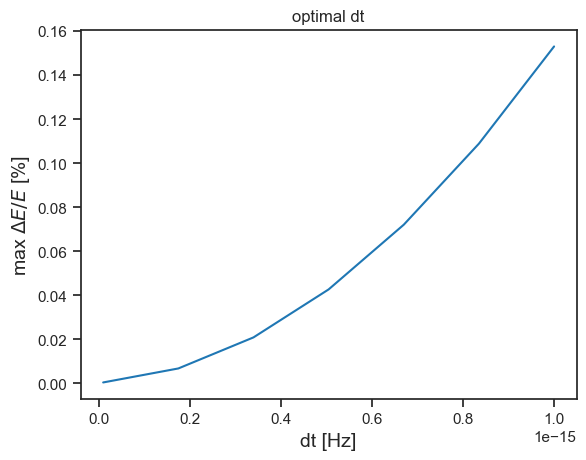

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

maxDiff_lst = []
prevDt = 0
found = False
for i, dt in enumerate(np.linspace(0.5E-15, 1E-15, 7)):
    df = pd.read_csv("simFor2WDt" + str(i) + ".log", sep='\s+')
    maxDiff = max(abs((df["E"].values - df['E'].values[0]) * 100/ df['E'].values[0]))
    #print(maxDiff)
    if maxDiff >= 0.1 and not found:
        print(prevDt)
        found = True
    maxDiff_lst.append(maxDiff)
    prevDt = dt

plt.title("optimal dt")
plt.xlabel('dt [Hz]')
plt.ylabel(r'max $\Delta E/E$ [%]')
plt.plot(np.linspace(0.1E-16, 1E-15, 7), maxDiff_lst)



## U over R

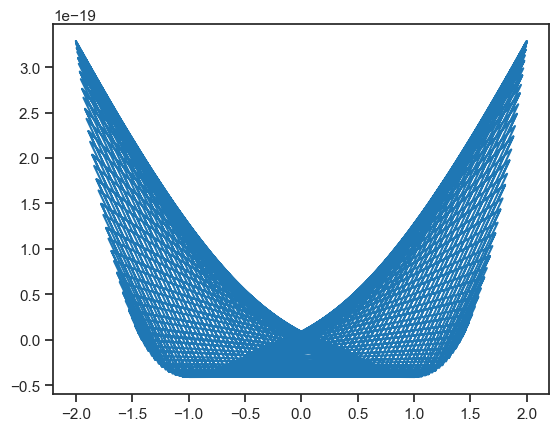

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simFor2Well.log", sep='\s+')

xyz = open("SimFor2Well.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    if(count % 3 != 2):
        pass
    else:
        line = i.split()
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

plt.plot(posX, df['U'])